<a href="https://colab.research.google.com/github/skarthi369/health-insurances/blob/main/health_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [ ]:
from google.colab import files

uploaded = files.upload()

import io
import pandas as pd

# Check if 'insurance.csv' is in the uploaded files, otherwise use the first key
if 'insurance.csv' in uploaded:
  file_content = uploaded['insurance.csv']
else:
  # Get the first key from the dictionary if 'insurance.csv' is not present
  first_key = list(uploaded.keys())[0]
  file_content = uploaded[first_key]
  print(f"Using file: {first_key} as 'insurance.csv' was not found.")

df = pd.read_csv(io.BytesIO(file_content))

Saving insurance.csv to insurance (5).csv
Using file: insurance (5).csv as 'insurance.csv' was not found.


In [ ]:
df = pd.read_csv("insurance (5).csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# Print the more information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Let us see statistical information about the Numerical features
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
# Let us see more statiscal information of the categorical features
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
  sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [ ]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Distribustion of BMI (Body Mass Index)')

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                    x='expenses',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'orange'],
                    title="Annual Medical Expenses")

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                    x="expenses",
                    marginal="box",
                    color="sex",
                    color_discrete_sequence=["blue", "purple"],
                    title="Annual Medical Expenses by Sex")

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                    x="expenses",
                    marginal="box",
                    color="region",
                    color_discrete_sequence=["grey", "orange", "green","violet"],
                    title="Annual Medical Expenses by Region")

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
px.histogram(df, x="smoker", color="sex", title="Smoker")

In [ ]:
px.histogram(df, x="region", color="smoker", title="Region")

In [ ]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

In [ ]:
fig = px.scatter(df,
                x="age",
                y="expenses",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs Expenses")

fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(df,
                x="bmi",
                y="expenses",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(df,
                x="bmi",
                y="expenses",
                color="smoker",
                hover_data=['region'],
                opacity=0.9,
                width=800,
                height=500,
                title= "BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show()

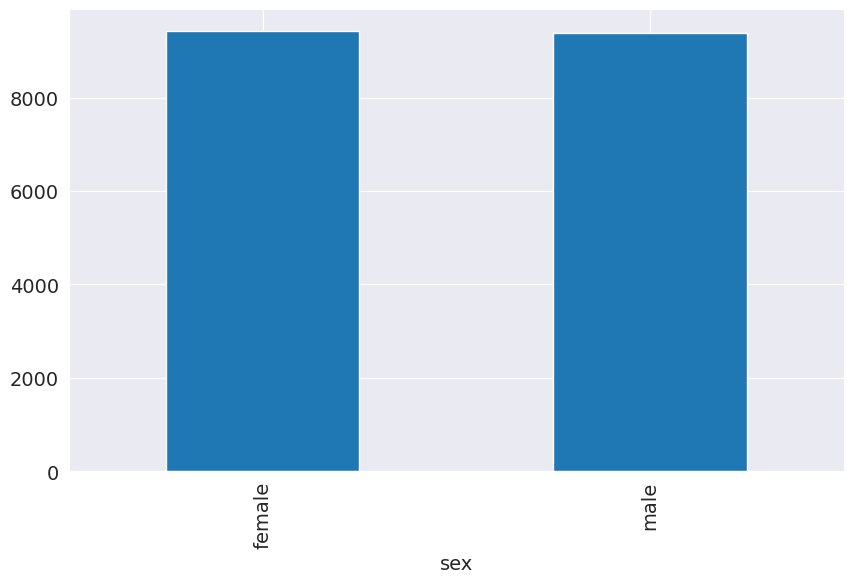

In [ ]:
df.groupby("sex")['expenses'].median().plot.bar()
plt.show()

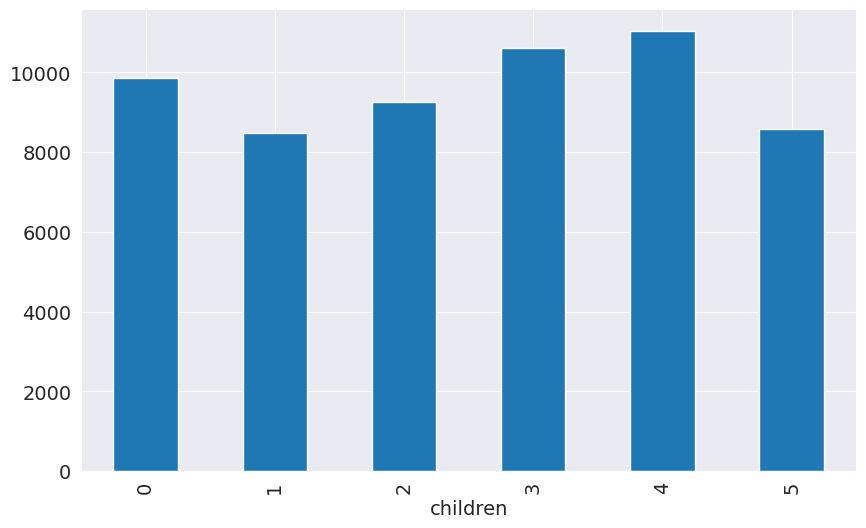

In [ ]:
df.groupby("children")['expenses'].median().plot.bar()
plt.show()

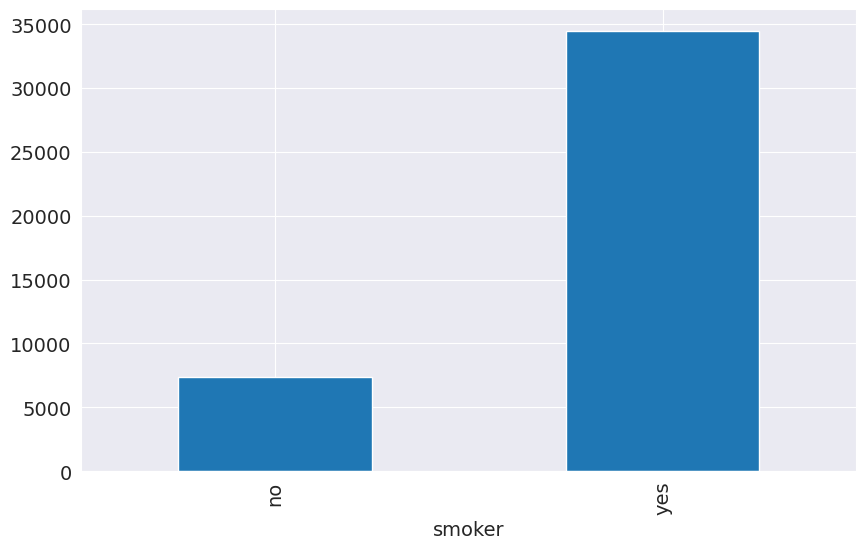

In [ ]:
df.groupby("smoker")['expenses'].median().plot.bar()
plt.show()

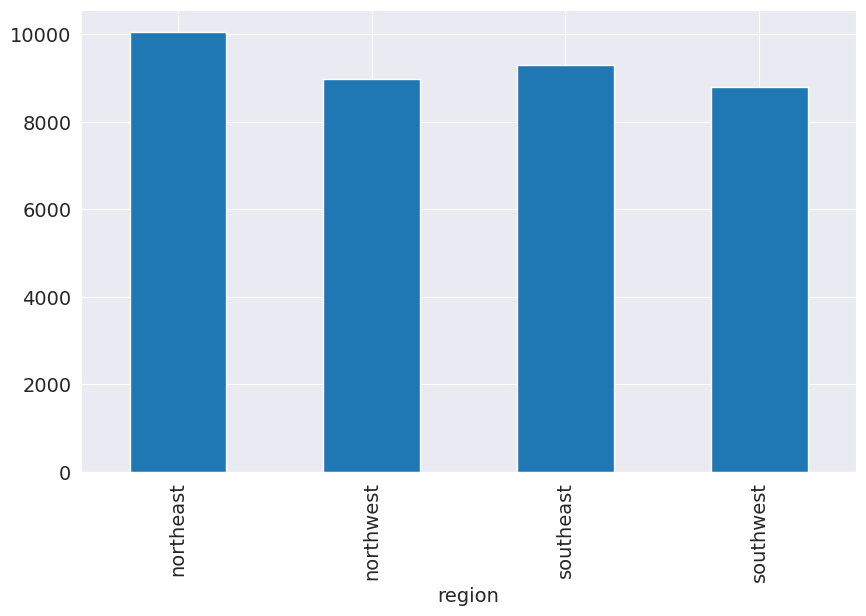

In [ ]:
df.groupby("region")['expenses'].median().plot.bar()
plt.show()

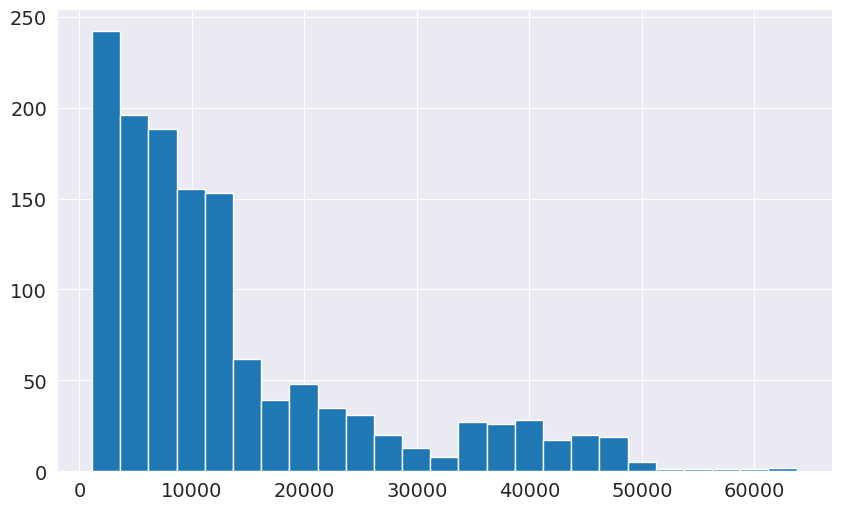

In [ ]:
df['expenses'].hist(bins=25)
plt.show()

In [ ]:
fig = px.histogram(data_frame=df, x='bmi', y='expenses', width=800, height=500, title='Expenses by BMI')
fig.show()

In [ ]:
fig = px.histogram(df, x="bmi", y="expenses", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="expenses", color='sex', facet_col="children")
fig.update_xaxes(matches=None)
fig.show()

In [ ]:
fig = px.pie(data_frame=df, names='sex', values='expenses', width=800, height=500, title='Expenses by Gender')
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="expenses", color="sex", width=900, height=500, title="Expenses by BMI & Gender")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="expenses", color="smoker", width=900, height=500, title="Expenses by BMI & Smoker")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="expenses", color="region", width=900, height=500, title="Expenses by BMI & Region")
fig.show()

In [ ]:
fig = px.violin(df, y="expenses", x= "sex")
fig.show()

In [ ]:
fig = px.violin(df, y="expenses", x= "smoker")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="expenses", color="sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="expenses", color="smoker", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="expenses", color="region", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.box(df, x="children", y="expenses", color="smoker", notched=True, title= "Expenses by Children & Smoker")
fig.show()

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

               age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000


In [ ]:
df.expenses.corr(df.age)

0.2990081922850828

In [ ]:
df.expenses.corr(df.bmi)

0.19857625501893206

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.expenses.corr(smoker_numeric)

0.7872514298985541

TypeError: lmplot() got an unexpected keyword argument 'size'

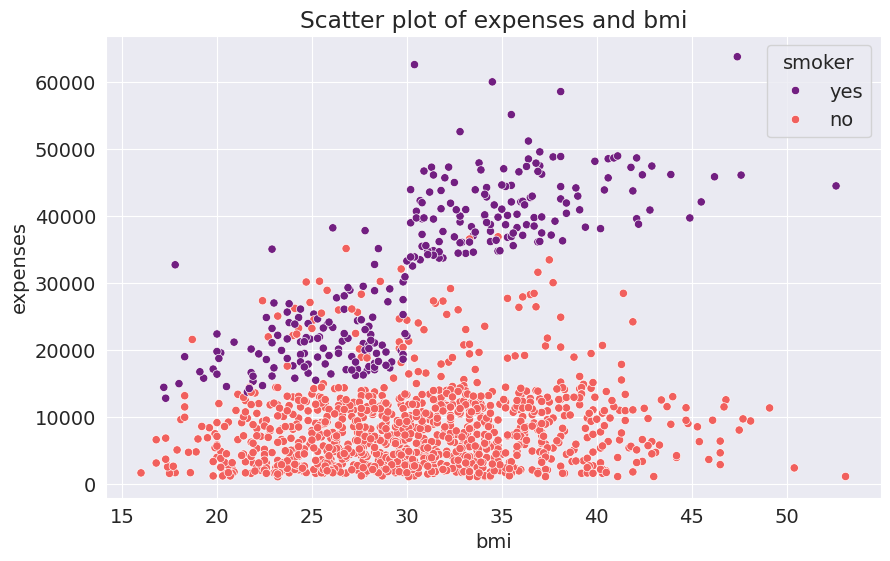

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of expenses and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette = 'magma', size = 8)


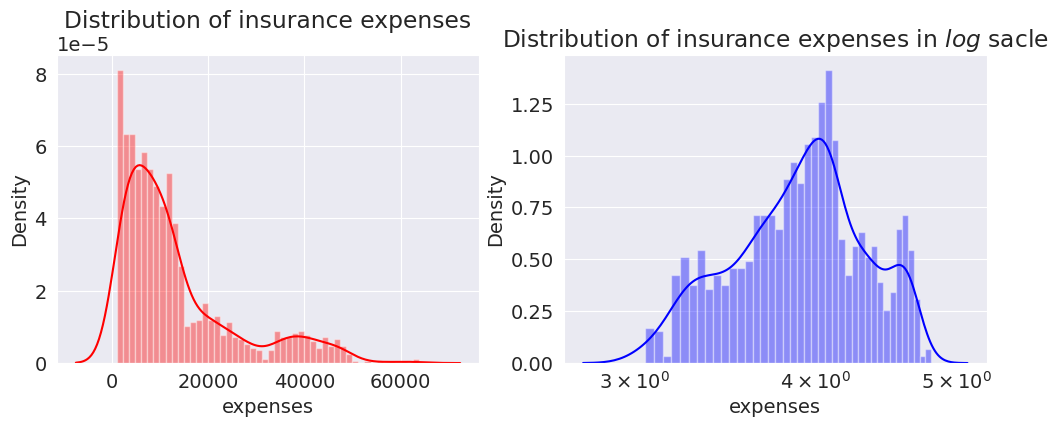

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');


In [ ]:
X = df.drop(['expenses'], axis=1)
y = df['expenses']

In [ ]:
# Saving the cleaned data
X.to_csv('clean_data.csv')

In [ ]:
#ONE -HOT ENCODING
# Creating new variables for numerical attributes/columns
numeric_features = ['age', 'bmi', 'children']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(1070, 6) (268,)


In [ ]:
#LINERAR REGRESSION
import numpy as np # Make sure numpy is imported

linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE manually using NumPy
linear_reg_rmse = np.sqrt(linear_reg_mse)

linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :33600065.35507783
The Root Mean Squared Error using Linear Regression :5796.556335884076
The r2_score using Linear Regression :0.7835726930039905


In [ ]:
# Assuming 'score' should hold the r2_score
score = linear_reg_r2_score

# If you want to access the highest score (which is just 'score' itself in this case):
highest_score = score

# Or if 'score' was a list:
# score = [linear_reg_r2_score, other_model_score1, other_model_score2, ...]
# highest_score = score[np.argmax(score)]

print(f"Highest score: {highest_score}")

Highest score: 0.7835726930039905


In [ ]:
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 33600065.35507783
The Root Mean Squared Error using Decision Tree Regressor : 5796.556335884076
The r2_score using Decision Tree Regressor : 0.864238671935167


In [ ]:
# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)

# Calculate RMSE by taking the square root of MSE
random_forest_rmse = np.sqrt(random_forest_mse)

random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 20205372.102802683
The Root Mean Squared Error using Random Forest Regressor : 4495.038609712122
The r2_score Error using Random Forest Regressor : 0.8698516141308336


In [ ]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)

# Calculate RMSE manually using NumPy
gradient_boosting_rmse = np.sqrt(gradient_boosting_mse)

gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 18733376.41931913
The Root Mean Squared Error using Gradient Boosting Regressor : 4328.207067518735
The r2_sccore using Gradient Boosting Regressor : 0.8793331451433305


In [ ]:
# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)

# Calculate RMSE manually using NumPy
xgb_reg_rmse = np.sqrt(xgb_reg_mse)  # Calculate RMSE from MSE

xgb_reg_r2_score = r2_score(y_test, y_pred5)

print("The mean square error using XGBoost is {}".format(xgb_reg_mse))
print("The root mean_squared error using XGBoost is {}".format(xgb_reg_rmse))
print("The r2 score using XGBoost is {}".format(xgb_reg_r2_score))

The mean square error using XGBoost is 24551739.910513733
The root mean_squared error using XGBoost is 4954.971232057128
The r2 score using XGBoost is 0.8418554578764859


In [ ]:
# Assuming you have imported KNeighborsRegressor as well
knn_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('knn_regressor' , KNeighborsRegressor())])

knn_reg.fit(X_train, y_train)

# Predicting the model
y_pred4 = knn_reg.predict(X_test)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)

# Calculate RMSE by taking the square root of MSE
knn_rmse = np.sqrt(knn_mse)

knn_r2_score = r2_score(y_test, y_pred4)

In [ ]:
pickle.dump(gradient_boosting_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))

In [ ]:
from google.colab import files

files.download('gradient_boosting_regressor_model.pkl')

In [ ]:
!pip install flask # or streamlit
!pip install pandas scikit-learn

In [ ]:
import pickle

with open('gradient_boosting_regressor_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
# @title Setting ngrok token
from pyngrok import ngrok
import subprocess
import os

# Get your authtoken from https://dashboard.ngrok.com/auth
ngrok_token = ""  # @param {type:"string"}
show_server_logs = True  # @param {type:"boolean"}

# Set ngrok authtoken
ngrok.set_auth_token(ngrok_token)

# Connect ngrok to port 5000 (Flask's default)
public_url = ngrok.connect(5000, 'http')

# Assuming your Flask app is in a file named 'app.py'
# in the current directory (adjust if needed)

# Start Flask app in a separate process
if show_server_logs:
    server_process = subprocess.Popen(['python', 'app.py'],
                                       stdout=subprocess.PIPE,
                                       stderr=subprocess.STDOUT,
                                       text=True)
else:
    subprocess.Popen(['python', 'app.py'])

# Print the public URL for accessing the app
print('Public URL:', public_url)

# If you want to see server logs, uncomment the lines below
if show_server_logs:
    for line in server_process.stdout:
        print(line, end='')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


2025-02-17 09:30:11.887 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 09:30:11.958 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-17 09:30:11.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 09:30:11.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 09:30:11.964 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 09:30:11.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 09:30:11.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 09:30:11.969 Session state does not 

ValueError: Specifying the columns using strings is only supported for dataframes.

In [ ]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html') # Create an index.html for input

@app.route('/predict', methods=['POST'])
def predict():
    # Get user inputs from the form
    age = int(request.form['age'])
    sex = request.form['sex']
    bmi = float(request.form['bmi'])
    # ... (Get other inputs similarly)

    # Preprocess the inputs (e.g., one-hot encoding)
    # ... (Use the same preprocessing steps as during training)

    # Make prediction using the loaded model
    prediction = model.predict([[age, sex, bmi, ...]]) # Input as a list

    return render_template('result.html', prediction=prediction[0]) # Display result

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
!pip install pyngrok flask

from flask import Flask, render_template, request
from pyngrok import ngrok
import pickle
import os

app = Flask(__name__)

# Get the absolute path to the model file
model_path = os.path.join(os.getcwd(), 'gradient_boosting_regressor_model.pkl')

# Load your trained model, handling potential FileNotFoundError
try:
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    print("Model loaded successfully from:", model_path)
except FileNotFoundError:
    print("Error: Model file not found at:", model_path)
    print("Please make sure the file exists and is in the correct location.")
    # You might want to exit or handle the error in a way that suits your application
    # For example:
    # import sys
    # sys.exit(1)  # Exit with an error code

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    age = int(request.form['age'])
    sex = request.form['sex']
    bmi = float(request.form['bmi'])
    # ... (Get other inputs similarly)

    # ... (Preprocess the inputs - one-hot encoding etc.) ...

    prediction = model.predict([[age, sex, bmi, ...]])  # Assuming model is loaded
    return render_template('result.html', prediction=prediction[0])

if __name__ == '__main__':
    # Set your ngrok Authtoken (replace with your actual token)
    ngrok.set_auth_token("")

    # Open a ngrok tunnel to the HTTP server
    public_url = ngrok.connect(5000).public_url
    print(f" * ngrok tunnel running at: {public_url}")

    app.run(debug=True)

ERROR: Operation cancelled by user
Error: Model file not found at: /content/gradient_boosting_regressor_model.pkl
Please make sure the file exists and is in the correct location.


ERROR:pyngrok.process.ngrok:t=2025-02-17T14:54:48+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-17T14:54:48+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-17T14:54:48+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.